In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [30]:
!pip install plotly

In [31]:
data=pd.read_csv("dataset.csv")

In [32]:
import plotly.express as px

In [33]:
!pip install bar-chart-race

In [34]:
import bar_chart_race as bcr

In [35]:
data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

## Data Understanding

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [38]:
data.shape

(112634, 17)

In [39]:
data.duplicated().sum()

0

In [40]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

## Handeling missing values

In [42]:
data.dropna(subset=["Model"],inplace=True)
data["Legislative District"].fillna(-1,inplace=True)
data["Vehicle Location"].fillna("Unknown",inplace=True)
data["Electric Utility"].fillna("Unknown",inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_15540\1454510509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Legislative District"].fillna(-1,inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_15540\1454510509.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [54]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [56]:
data.head(20)

VIN (1-10)     County               City State  Postal Code  Model Year  \
0   JTMEB3FV6N     Monroe           Key West    FL        33040        2022   
1   1G1RD6E45D      Clark           Laughlin    NV        89029        2013   
2   JN1AZ0CP8B     Yakima             Yakima    WA        98901        2011   
3   1G1FW6S08H     Skagit           Concrete    WA        98237        2017   
4   3FA6P0SU1K  Snohomish            Everett    WA        98201        2019   
5   5YJ3E1EB5J  Snohomish            Bothell    WA        98021        2018   
6   1N4AZ0CP4D  Snohomish            Everett    WA        98203        2013   
7   1N4AZ0CP0D  Snohomish           Mukilteo    WA        98275        2013   
8   1N4BZ0CP4G     Island            Clinton    WA        98236        2016   
9   KNDJP3AE2G     Skagit          Anacortes    WA        98221        2016   
10  WA1F2AFY1L   Thurston              Lacey    WA        98516        2020   
11  5YJXCBE23L      Grant         Moses Lake    WA        98837        2020   
12  3C3CFFGE3G  St. Clair          Mascoutah    IL        62258        2016   
13  1G1RD6S50G   Thurston          Rochester    WA        98579        2016   
14  5YJ3E1EA1J     Skagit         Burlington    WA        98233        2018   
15  1N4BZ1CP4K  Snohomish            Everett    WA        98201        2019   
16  1N4AZ0CP4D     Pierce           Kapowsin    WA        98344        2013   
17  1N4BZ0CP4H  Snohomish         Marysville    WA        98271        2017   
18  5UXKT0C50G  Snohomish           Lynnwood    WA        98037        2016   
19  5YJXCAE28G   Saratoga  Greenfield Center    NY        12833        2016   

         Make       Model                   Electric Vehicle Type  \
0      TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1   CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
3   CHEVROLET     BOLT EV          Battery Electric Vehicle (BEV)   
4        FORD      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
5       TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
6      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
7      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
8      NISSAN        LEAF          Battery Electric Vehicle (BEV)   
9         KIA        SOUL          Battery Electric Vehicle (BEV)   
10       AUDI        Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
11      TESLA     MODEL X          Battery Electric Vehicle (BEV)   
12       FIAT         500          Battery Electric Vehicle (BEV)   
13  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
14      TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
15     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
16     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
17     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
18        BMW          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
19      TESLA     MODEL X          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              42   
1            Clean Alternative Fuel Vehicle Eligible              38   
2            Clean Alternative Fuel Vehicle Eligible              73   
3            Clean Alternative Fuel Vehicle Eligible             238   
4              Not eligible due to low battery range              26   
5            Clean Alternative Fuel Vehicle Eligible             215   
6            Clean Alternative Fuel Vehicle Eligible              75   
7            Clean Alternative Fuel Vehicle Eligible              75   
8            Clean Alternative Fuel Vehicle Eligible              84   
9            Clean Alternative Fuel Vehicle Eligible              93   
10             Not eligible due to low battery range              20   
11           Clean Alternative

## Removing outliers

In [74]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [76]:
remove_outliers(data,"Electric Range")
remove_outliers(data,"Base MSRP")

VIN (1-10)     County           City State  Postal Code  Model Year  \
0       JTMEB3FV6N     Monroe       Key West    FL        33040        2022   
1       1G1RD6E45D      Clark       Laughlin    NV        89029        2013   
2       JN1AZ0CP8B     Yakima         Yakima    WA        98901        2011   
3       1G1FW6S08H     Skagit       Concrete    WA        98237        2017   
4       3FA6P0SU1K  Snohomish        Everett    WA        98201        2019   
...            ...        ...            ...   ...          ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA        98019        2022   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA        98250        2019   
112631  1FMCU0KZ4N       King         Vashon    WA        98070        2022   
112632  KNDCD3LD4J       King      Covington    WA        98042        2018   
112633  YV4BR0CL8N       King      Covington    WA        98042        2022   

             Make       Model                   Electric Vehicle Type  \
0          TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1       CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2          NISSAN        LEAF          Battery Electric Vehicle (BEV)   
3       CHEVROLET     BOLT EV          Battery Electric Vehicle (BEV)   
4            FORD      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
...           ...         ...                                     ...   
112629      TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
112630     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
112631       FORD      ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
112632        KIA        NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
112633      VOLVO        XC90  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              42   
1                 Clean Alternative Fuel Vehicle Eligible              38   
2                 Clean Alternative Fuel Vehicle Eligible              73   
3                 Clean Alternative Fuel Vehicle Eligible             238   
4                   Not eligible due to low battery range              26   
...                                                   ...             ...   
112629  Eligibility unknown as battery range has not b...               0   
112630            Clean Alternative Fuel Vehicle Eligible             150   
112631            Clean Alternative Fuel Vehicle Eligible              38   
112632              Not eligible due to low battery range              26   
112633              Not eligible due to low battery range              18   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  -1.0       198968248   
1               0                  -1.0         5204412   
2               0                  15.0       218972519   
3               0                  39.0       186750406   
4               0                  38.0         2006714   
...           ...                   ...             ...   
112629          0                  45.0       217955265   
112630          0                  40.0       103663227   
112631          0                  34.0       193878387   
112632          0                  47.0       125039043   
112633          0                  47.0       194673692   

                   Vehicle Location  \
0         POINT (-81.80023 24.5545)   
1       POINT (-114.57245 35.16815)   
2       POINT (-120.50721 46.60448)   
3        POINT (-121.7515 48.53892)   
4       POINT (-122.20596 47.97659)   
...                             ...   
112629  POINT (-121.98609 47.74068)   
112630  POINT (-123.01648 48.53448)   
112631   POINT (-122.4573 47.44929)   
112632  POINT (-122.09124 47.33778)   
112633  POINT (-122.09124 47.33778)   

                                         Electric Utility  2020 Census Tract  


## Univarient Analysis

In [80]:
data.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112614.000000  112614.000000   112614.000000  112614.000000   
mean    98156.234278    2019.002655       87.828583    1793.758192   
std      2648.967665       2.892130      102.336611   10784.684549   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98120.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112614.000000    1.126140e+05       1.126140e+05  
mean              29.727192    1.994529e+08       5.296648e+10  
std               14.763241    9.399217e+07       1.699255e+09  
min               -1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484102e+08       5.303301e+10  
50%               34.000000    1.923844e+08       5.303303e+10  
75%               43.000000    2.191865e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

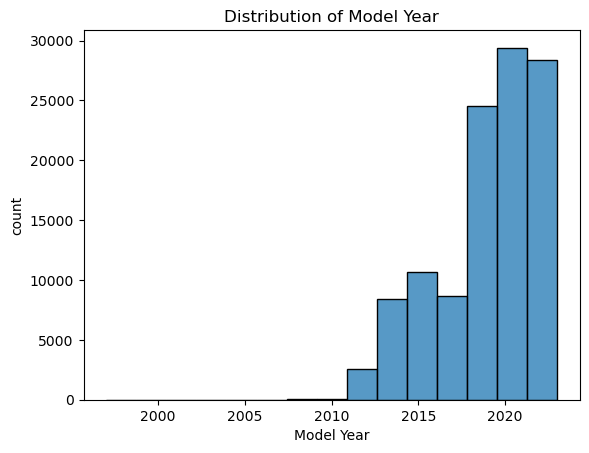

In [108]:
sns.histplot(x='Model Year', data=data, bins=15, kde=False)  
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('count')
plt.show()

In [82]:
data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            86024
Plug-in Hybrid Electric Vehicle (PHEV)    26590
Name: count, dtype: int64

C:\Users\shrey\AppData\Local\Temp\ipykernel_15540\1779567274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Electric Vehicle Type', data=data, palette='viridis')


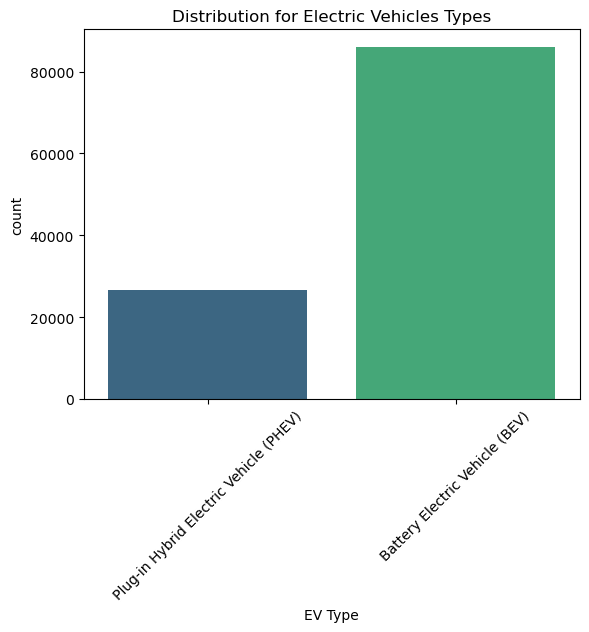

In [110]:
sns.countplot(x='Electric Vehicle Type', data=data, palette='viridis')
plt.title('Distribution for Electric Vehicles Types')
plt.xlabel('EV Type')
plt.ylabel('count')
plt.xticks(rotation=45)  
plt.show()

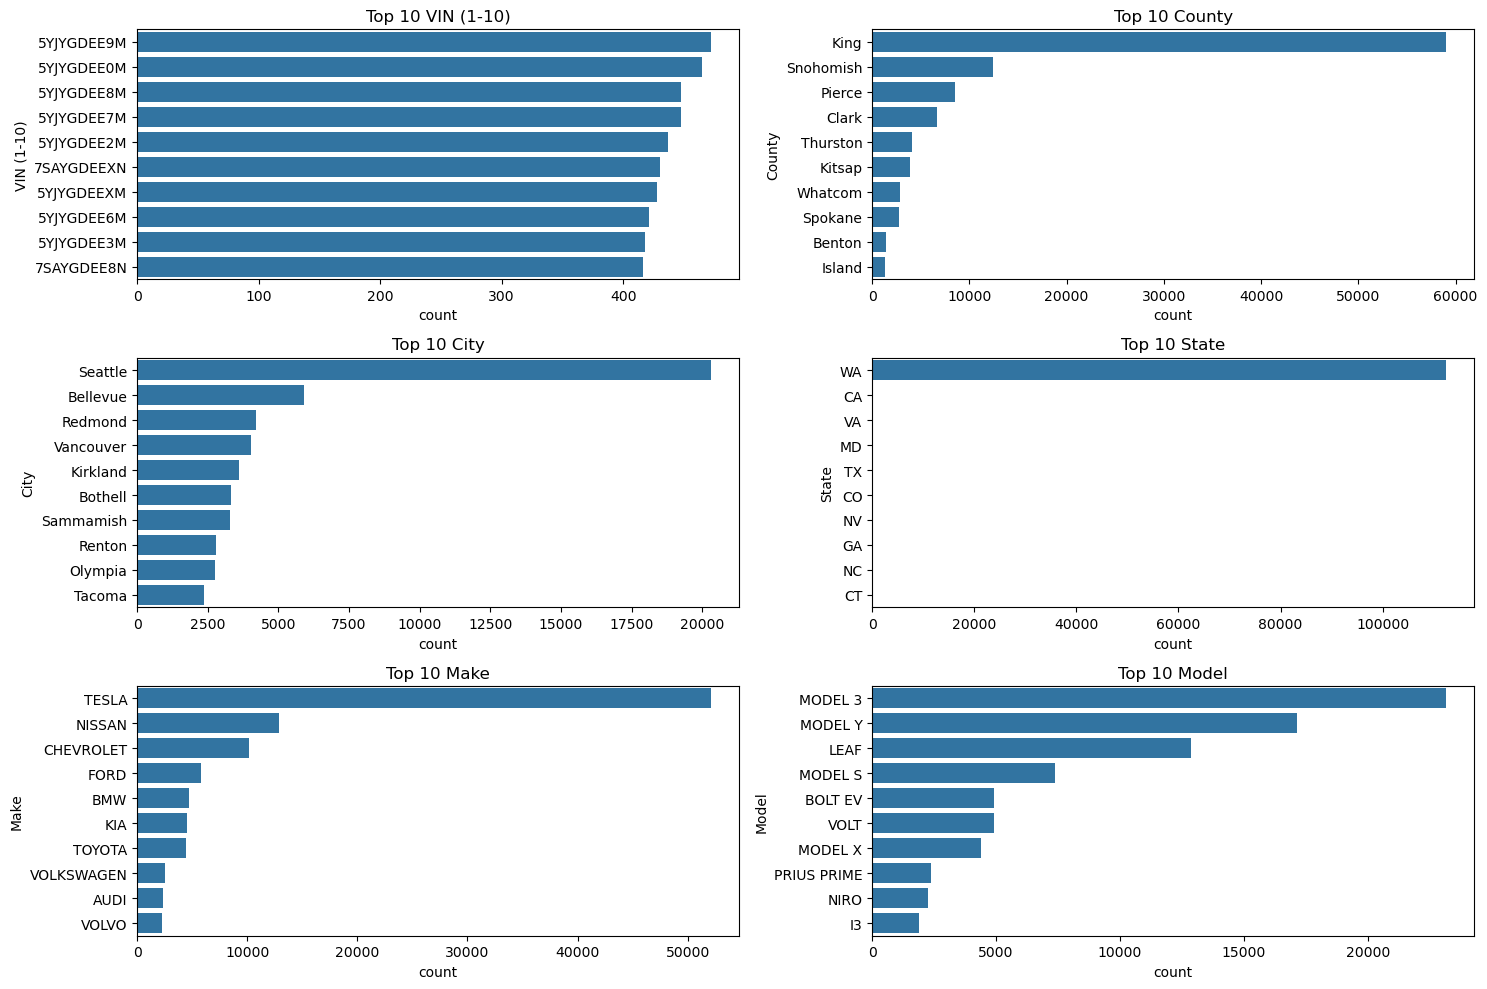

In [102]:
categorical_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Vehicle_Location', 'Electric_Utility']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[:6], 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[column], order=data[column].value_counts().index[:10])
    plt.title(f'Top 10 {column}')
plt.tight_layout()
plt.show()

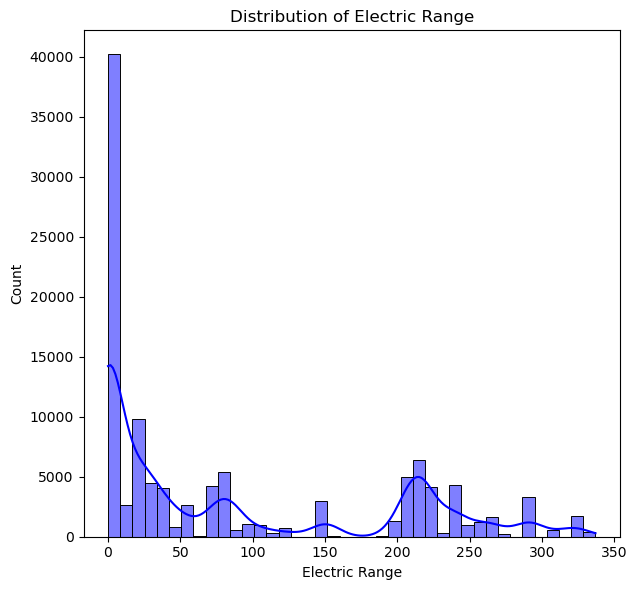

In [106]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Electric Range'], kde=True, color='blue')
plt.title('Distribution of Electric Range')

plt.tight_layout()
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_15540\949267025.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Make', data=data, palette='viridis')


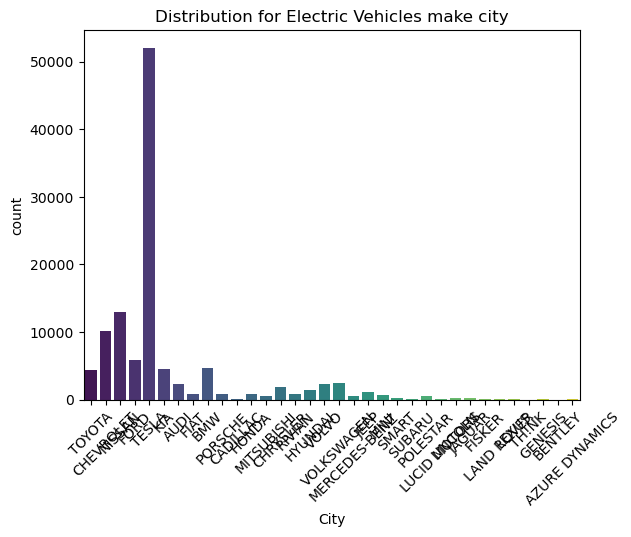

In [116]:
sns.countplot(x='Make', data=data, palette='viridis')
plt.title('Distribution for Electric Vehicles make city')
plt.xlabel('City')
plt.ylabel('count')
plt.xticks(rotation=45)  
plt.show()

## Bivarient Analysis

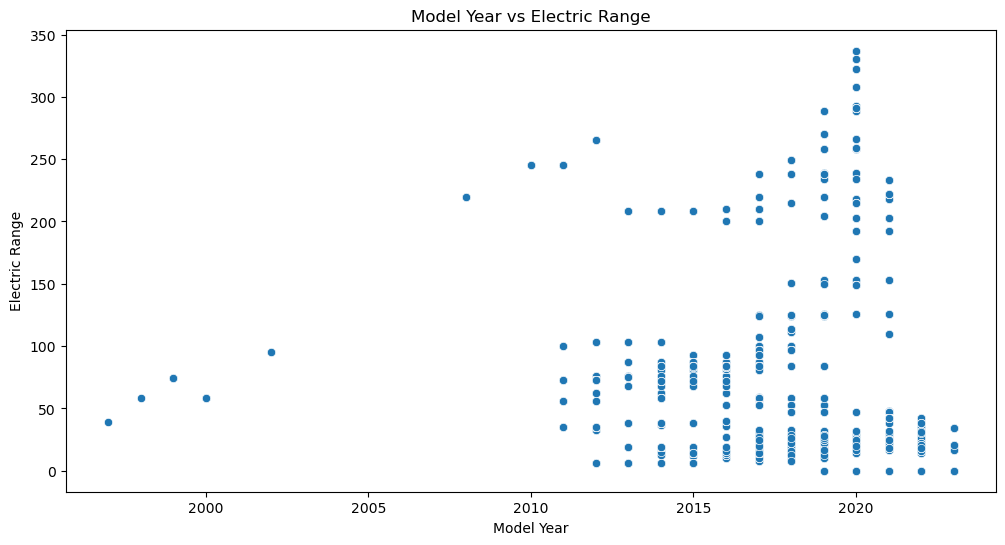

In [125]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=data)
plt.title('Model Year vs Electric Range')
plt.show()

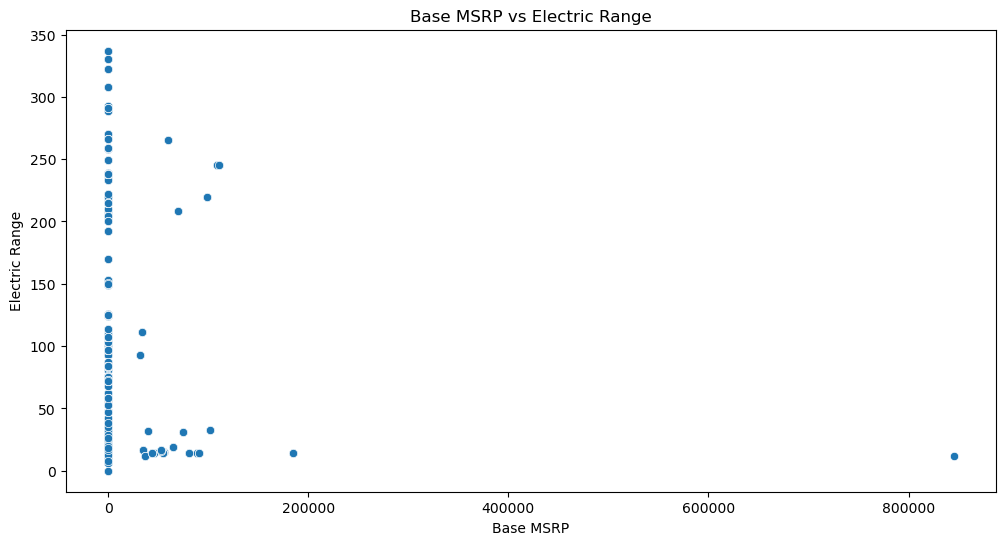

In [134]:
if data['Base MSRP'].sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Base MSRP', y='Electric Range', data=data)
    plt.title('Base MSRP vs Electric Range')
    plt.show()

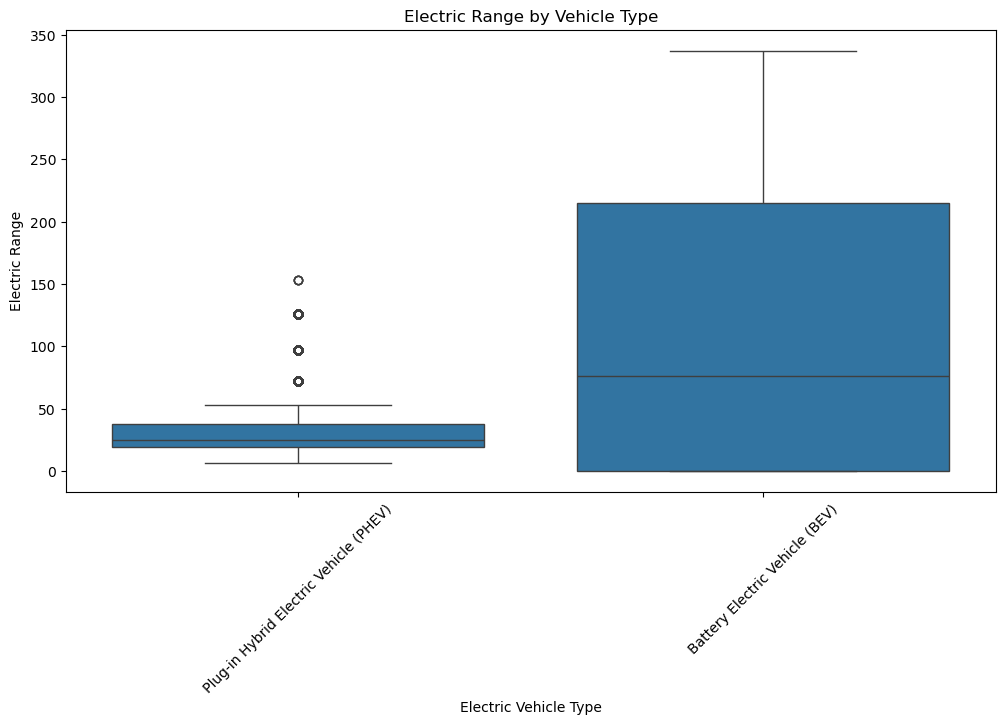

In [136]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=data)
plt.title('Electric Range by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

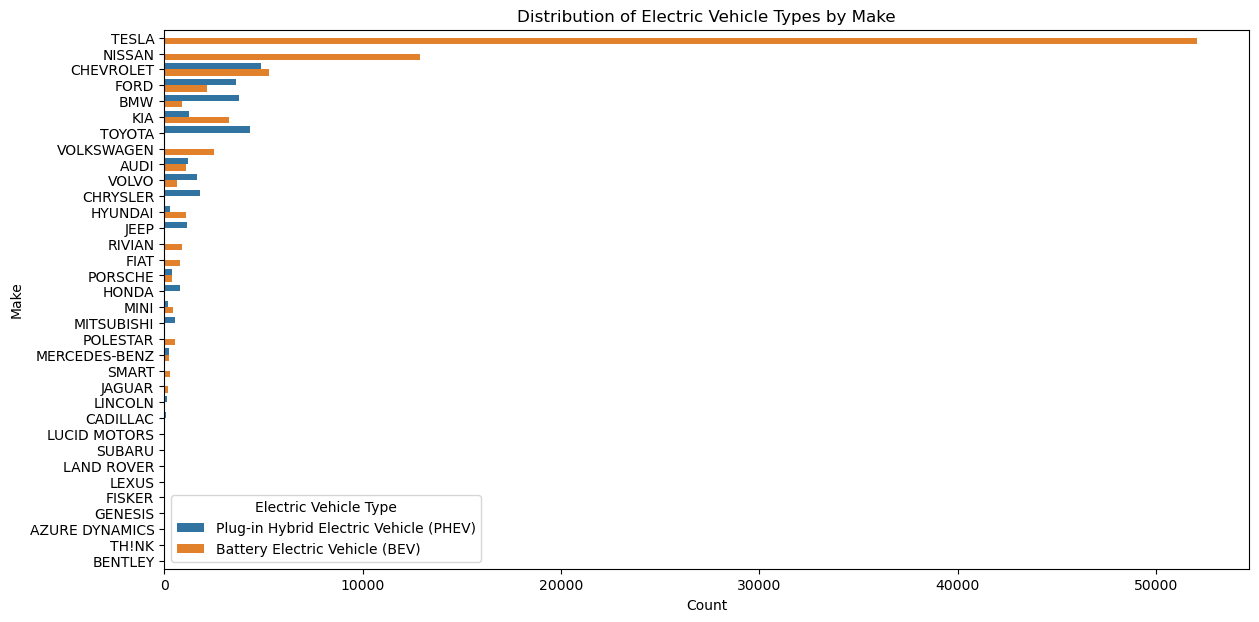

In [144]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Make', hue='Electric Vehicle Type', data=data, order=data['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicle Types by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.legend(title='Electric Vehicle Type')
plt.show()

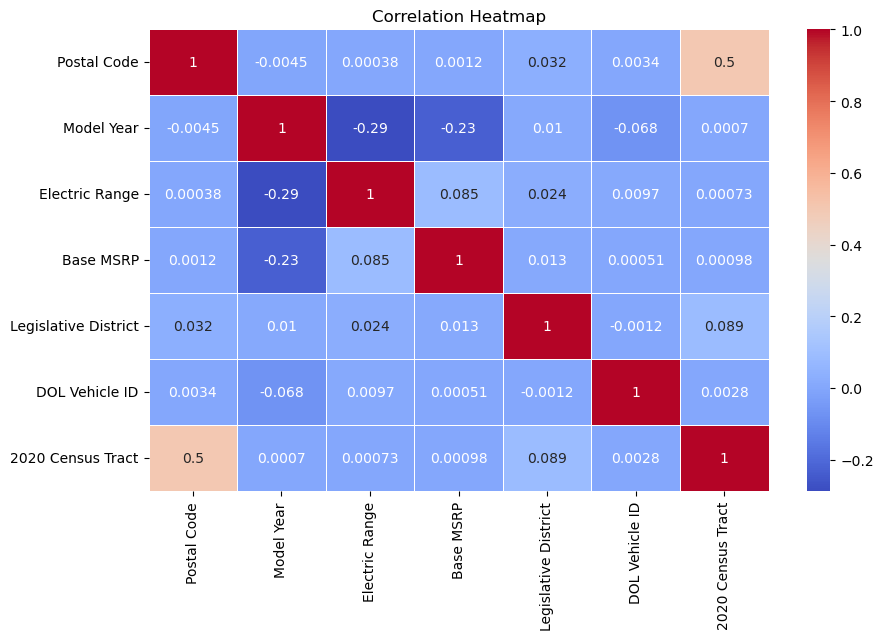

In [148]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

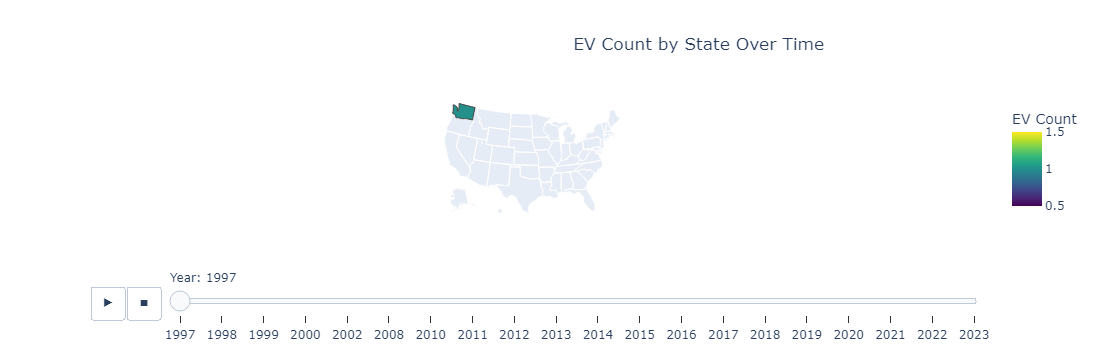

In [173]:
state_year_aggregated = data.groupby(['State', 'Model Year']).size().reset_index(name='EV Count').sort_values(by='Model Year')

fig = px.choropleth(
    state_year_aggregated,
    locations='State',
    locationmode='USA-states',
    color='EV Count',
    hover_name='State',
    animation_frame='Model Year',
    scope='usa',
    color_continuous_scale='Viridis',
    title='EV Count by State Over Time'
)

fig.update_layout(
    title_x=0.75,
    geo=dict(
        scope='usa',
        projection={'type': 'albers usa'}
    ),
    transition={'duration': 500},
    sliders=[{
        'currentvalue': {"prefix": "Year: "},
        'pad': {"t": 50}
    }]
)

fig.show()



C:\Users\shrey\anaconda3\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



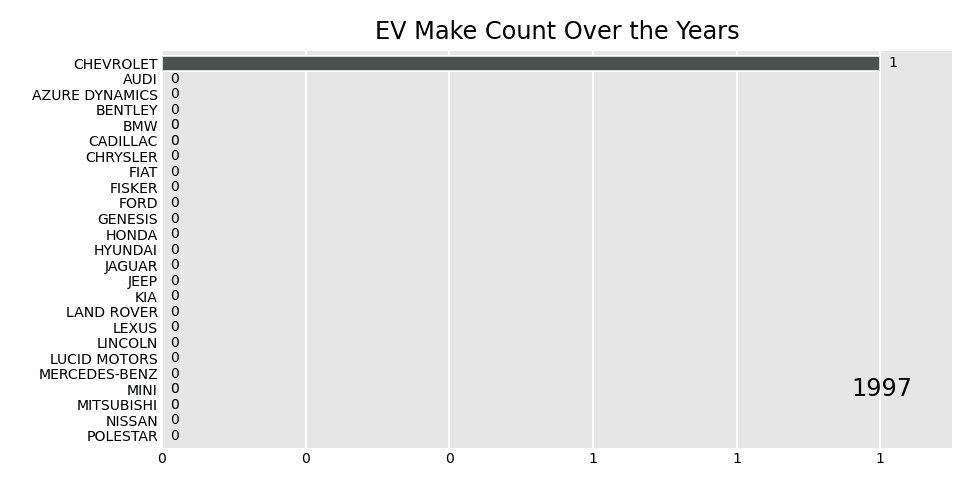

In [203]:
from IPython.display import Image
count_df = data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Pivot the DataFrame to the required format
pivot_df = count_df.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

warnings.filterwarnings("ignore", category=UserWarning)

# Creating the racing bar plot and saving as a GIF
bcr.bar_chart_race(pivot_df,filename='EV_racing_bar_plot.gif',orientation='h',sort='desc',n_bars=25,
                   title='EV Make Count Over the Years',filter_column_colors=True,period_length=1000,writer='pillow')

Image(filename='EV_racing_bar_plot.gif')